# CREMI Dataset
#### Authors: Benedict Au, Amanda Zang, Jenny Zhang
#### Apr 1, 2020

In [120]:
import h5py
import os
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Viewing hdf5 file hierarchy

In h5py, groups work like dictionaries, and datasets work like NumPy arrays. 

Here is the file hierarchy of Sample A:

In [129]:
filename = "./data_cremi/sample_A_20160501.hdf"
f = h5py.File(filename, 'r')

os.system("h5dump -n ./data_cremi/sample_A_20160501.hdf")
result = subprocess.run(["h5dump", "-n", filename], stdout=subprocess.PIPE)
print(result.stdout.decode('utf-8'))

HDF5 "./data_cremi/sample_A_20160501.hdf" {
FILE_CONTENTS {
 group      /
 group      /__DATA_TYPES__
 datatype   /__DATA_TYPES__/Enum_Boolean
 datatype   /__DATA_TYPES__/String_VariableLength
 group      /annotations
 group      /annotations/comments
 dataset    /annotations/comments/comments
 dataset    /annotations/comments/target_ids
 dataset    /annotations/ids
 dataset    /annotations/locations
 group      /annotations/presynaptic_site
 dataset    /annotations/presynaptic_site/partners
 dataset    /annotations/types
 group      /volumes
 group      /volumes/labels
 dataset    /volumes/labels/clefts
 dataset    /volumes/labels/neuron_ids
 dataset    /volumes/raw
 }
}



In [147]:
f["/__DATA_TYPES__/Enum_Boolean"]

<HDF5 named type "Enum_Boolean" (dtype |b1)>

In greater detail:

In [130]:
result = subprocess.run(["h5dump", "-H", "-A", "0", filename], stdout=subprocess.PIPE)
print(result.stdout.decode('utf-8'))

HDF5 "./data_cremi/sample_A_20160501.hdf" {
GROUP "/" {
   GROUP "__DATA_TYPES__" {
      DATATYPE "Enum_Boolean" H5T_ENUM {
         H5T_STD_I8LE;
         "FALSE"            0;
         "TRUE"             1;
      };
      DATATYPE "String_VariableLength" H5T_STRING {
         STRSIZE H5T_VARIABLE;
         STRPAD H5T_STR_NULLTERM;
         CSET H5T_CSET_ASCII;
         CTYPE H5T_C_S1;
      };
   }
   GROUP "annotations" {
      GROUP "comments" {
         DATASET "comments" {
            DATATYPE  H5T_STRING {
               STRSIZE H5T_VARIABLE;
               STRPAD H5T_STR_NULLTERM;
               CSET H5T_CSET_UTF8;
               CTYPE H5T_C_S1;
            }
            DATASPACE  SIMPLE { ( 17 ) / ( 17 ) }
         }
         DATASET "target_ids" {
            DATATYPE  H5T_STD_U64LE
            DATASPACE  SIMPLE { ( 17 ) / ( 17 ) }
         }
      }
      DATASET "ids" {
         DATATYPE  H5T_STD_U64LE
         DATASPACE  SIMPLE { ( 432 ) / ( 432 ) }
      }
      DATASET

Visualise one layer of the raw data, including raw data (125 x 1250 x 1250), and clefts and neuron_ids labels:

Dataset dimensions: (125, 1250, 1250) 

Layer 0: 

[[118 111 103 ... 151 152 149]
 [112 102 102 ... 146 150 147]
 [110 105 105 ... 147 141 135]
 ...
 [108 106 115 ... 160 158 151]
 [113 113 125 ... 158 152 148]
 [117 121 125 ... 152 146 146]] 



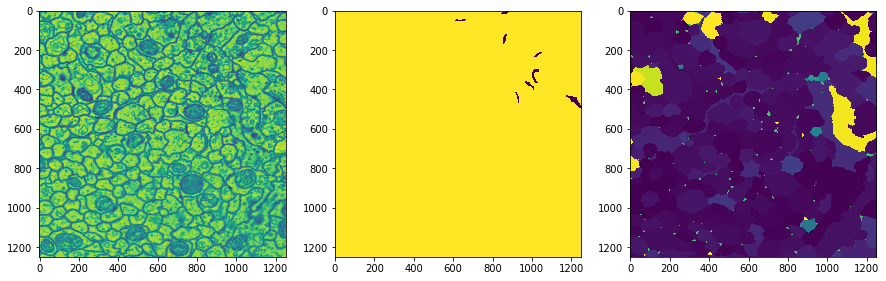

In [150]:
layer = 0

raw = f["/volumes/raw"]
raw_layer = raw[layer]
clefts = f["/volumes/labels/clefts"]
clefts_layer = clefts[layer]
neuron_ids = f["/volumes/labels/neuron_ids"]
neuron_ids_layer = neuron_ids[layer]


print("Dataset dimensions: {}".format(raw.shape), "\n")
print("Layer {}: \n".format(layer))
print(raw_layer, "\n")

fig, axarr = plt.subplots(1,3,figsize=(15,15))

axarr[0].imshow(raw_layer)
axarr[1].imshow(clefts_layer)
axarr[2].imshow(neuron_ids_layer);